In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("/Users/Lenovo/Desktop/EBAC")

In [39]:
data = pd.read_csv("kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [153]:
# Agregamos la columna de 1s (Intercepto)
data['intercepto'] = 1
data_limpia = data[['intercepto', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long', 'price']]
print(data_limpia.shape)
data_limpia.head()

(21613, 13)


,intercepto,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,price
0,1,3,1.00,1180,5650,1.0,0,0,3,7,47.5112,-122.257,221900.0
1,1,3,2.25,2570,7242,2.0,0,0,3,7,47.7210,-122.319,538000.0
2,1,2,1.00,770,10000,1.0,0,0,3,6,47.7379,-122.233,180000.0
3,1,4,3.00,1960,5000,1.0,0,0,5,7,47.5208,-122.393,604000.0
4,1,3,2.00,1680,8080,1.0,0,0,3,8,47.6168,-122.045,510000.0


In [155]:
# Asignamos las variables X y Y
Xdata = data_limpia[['intercepto', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long']].values
Ydata = data_limpia[['price']].values

In [157]:
# Dividir bases de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state = 1)

In [159]:
X = X_train
Y = Y_train

In [161]:
# Opciones de formato numerico
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [163]:
XT_X = np.matmul(np.matrix.transpose(X), X)
XT_X_inv = np.linalg.inv(XT_X)
XT_Y = np.matmul(np.matrix.transpose(X), Y)
betas = np.matmul(XT_X_inv, XT_Y)

In [165]:
# TSS, ESS, RSS
TSS = np.matmul(np.matrix.transpose(Y), Y) - len(Y) * (Y.mean()**2)
ESS = np.matmul(np.matmul(np.matrix.transpose(betas), np.matrix.transpose(X)), np.matmul(X, betas)) - len(Y)*(Y.mean()**2)
RSS = TSS - ESS

In [167]:
# Calculo del coeficiente de determinacion de R2
RSq = 1 - (RSS/TSS)
RSq

array([[0.676345]])

In [169]:
# Calculo de  Coeficiente de Determinacion R Cuadrada Ajustada
RSqAj = 1 - (RSS / (X.shape[0] - X.shape[1])) / (TSS / (X.shape[0] - 1))
RSqAj

array([[0.676139]])

In [171]:
# Reporte Automatizado de la regresion en Python
import statsmodels.api as sm

regressor = sm.OLS(Y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     3282.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:47:15   Log-Likelihood:            -2.3569e+05
No. Observations:               17290   AIC:                         4.714e+05
Df Residuals:                   17278   BIC:                         4.715e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.741e+07   1.46e+06    -39.255      0.0

In [173]:
# Apliacion del modelo sobre la base de prueba
Y_pred = np.matmul(X_test, betas)
Y_pred

array([[629664.504457],
       [482437.700406],
       [726359.055207],
       ...,
       [340732.153261],
       [1326728.308202],
       [371544.516950]])

In [175]:
# Calculo de residuales
Resid = Y_test - Y_pred
Resid

array([[-170664.504457],
       [-37437.700406],
       [330640.944793],
       ...,
       [-80732.153261],
       [468271.691798],
       [46455.483050]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

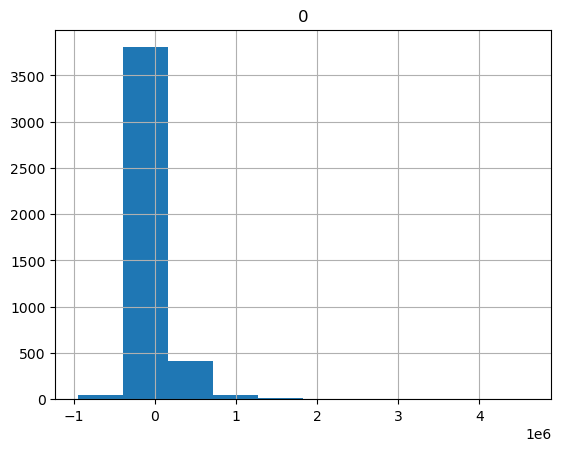

In [177]:
# Grafico del histograma de residuales para la base de prueba
df = pd.DataFrame(Resid)
df.hist()

In [179]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Coeficiente R Cuadrado", r2_score(Y_test, Y_pred))

Coeficiente R Cuadrado 0.6594039375429049


## Conclusion
En este ejercicio pudimos encontrar que ambos modelos (el manual y el automatico) tienen el resultado muy similar, aunque tomamos las variables mas relevantes a la hora de elegir una casa, los modelos nos dan como resultado un 67.6% por lo que no se le pudiera considerar muy confiable, en este caso si tuvieramos una base mucho mas grande creo que el resultado podria mejorar.